# Task 3

Building a decision tree classifier to predict whether an individual's income is above or below $50,000 per year.

In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Task3.csv')

# Display the first few rows and summary information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


(None,
   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
 0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
 1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
 2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
 3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                            

In [39]:
# Re-load the dataset with the correct delimiter
data = pd.read_csv('Task3.csv', delimiter=';')

In [40]:
# Display the first few rows and summary information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(None,
    age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  

# Visualising which features are most important to the decision tree model.

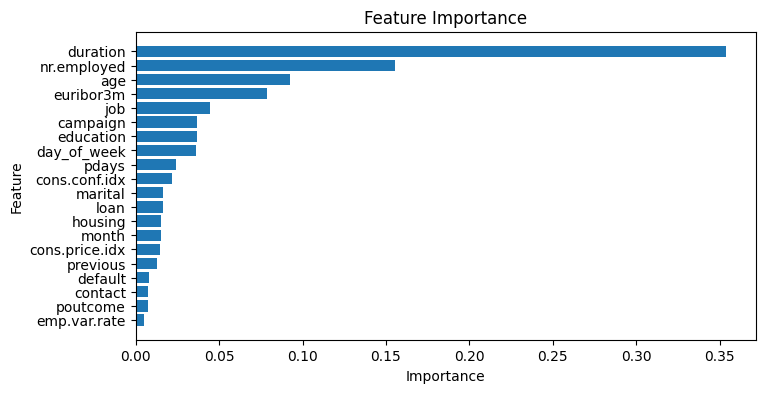

In [41]:
import matplotlib.pyplot as plt

# Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


A heatmap of the confusion matrix helps to visualize the true positive, true negative, false positive, and false negative rates.

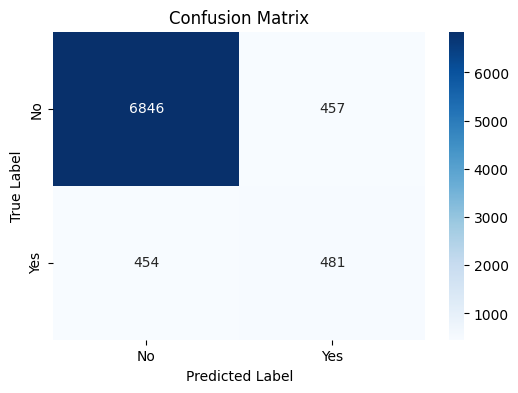

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:

True Negatives (Class 0 correctly predicted): 6846

False Positives (Class 0 predicted as Class 1): 457

False Negatives (Class 1 predicted as Class 0): 454

True Positives (Class 1 correctly predicted): 481

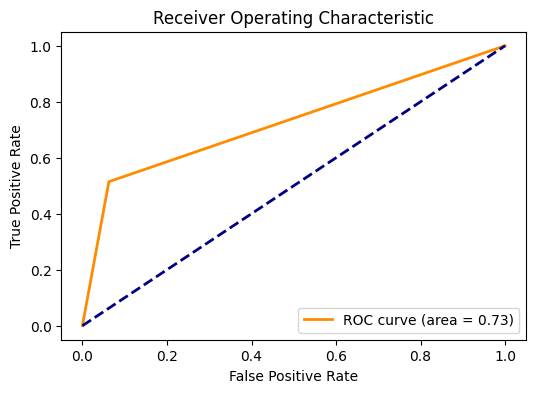

In [44]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features (X) and target (y)
X = data.drop(columns='y')
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


(0.8894149065307113,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94      7303\n           1       0.51      0.51      0.51       935\n\n    accuracy                           0.89      8238\n   macro avg       0.73      0.73      0.73      8238\nweighted avg       0.89      0.89      0.89      8238\n',
 array([[6846,  457],
        [ 454,  481]]))

Accuracy: The model achieved an accuracy of approximately 88.94%.

Classification Report:

Class 0 (No Purchase):

Precision: 94%

Recall: 94%

F1-score: 94%

Class 1 (Purchase):

Precision: 51%

Recall: 51%

F1-score: 51%


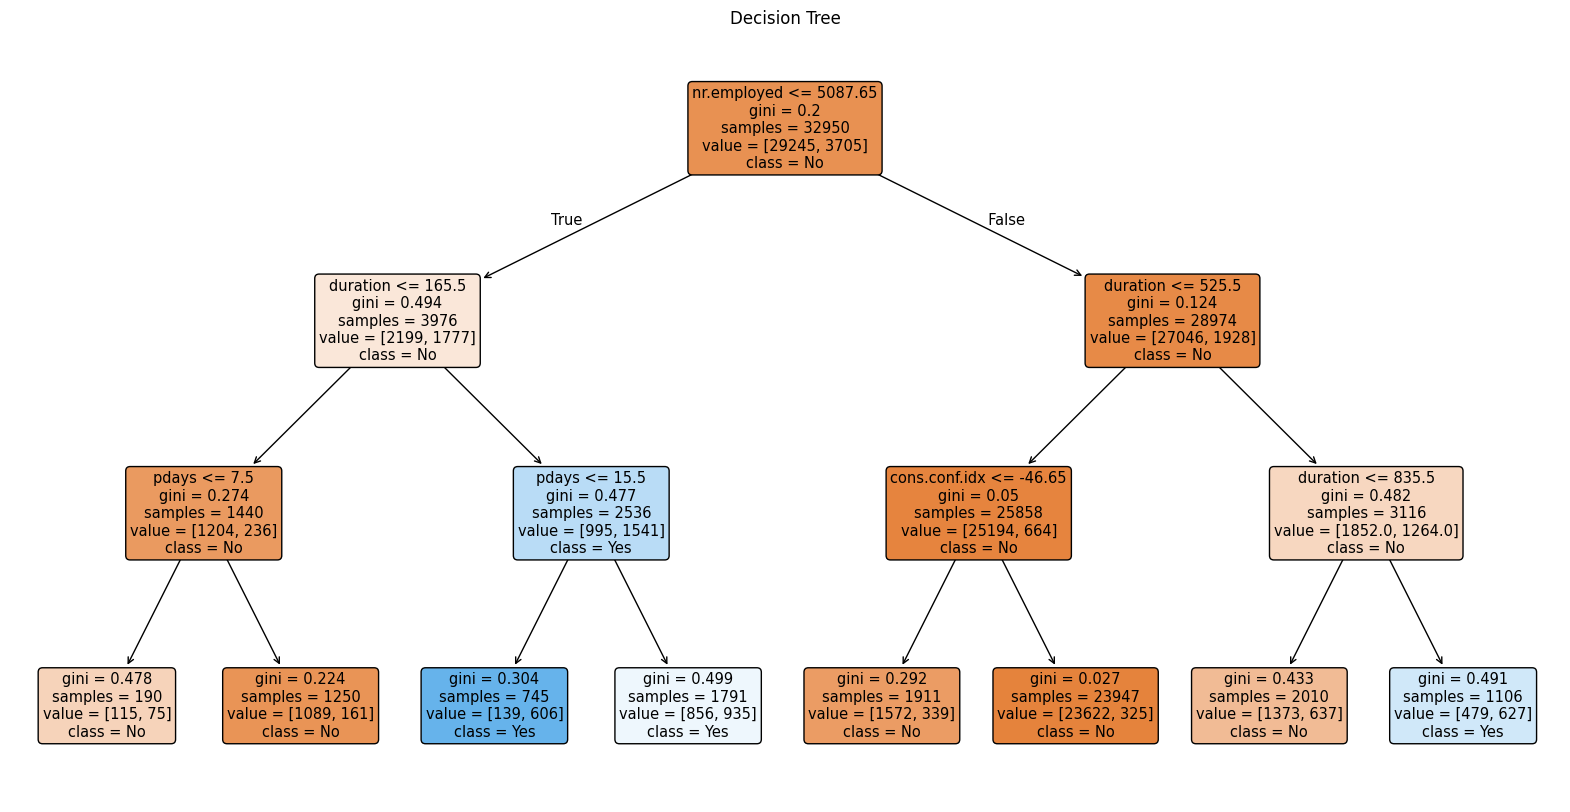

In [48]:
# Visualize the smaller decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_small, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()
